In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('diabetes.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                50736 non-null  float64
 1   HighChol              50736 non-null  float64
 2   BMI                   50736 non-null  float64
 3   Smoker                50736 non-null  float64
 4   Stroke                50736 non-null  float64
 5   HeartDiseaseorAttack  50736 non-null  float64
 6   PhysActivity          50736 non-null  float64
 7   Fruits                50736 non-null  float64
 8   Veggies               50736 non-null  float64
 9   HvyAlcoholConsump     50736 non-null  float64
 10  AnyHealthcare         50736 non-null  float64
 11  GenHlth               50736 non-null  float64
 12  MentHlth              50736 non-null  float64
 13  PhysHlth              50736 non-null  float64
 14  DiffWalk              50736 non-null  float64
 15  Sex                

### Bagian 2

In [4]:
# Duplicate value
print("Jumlah data yang duplikat:", len([data.duplicated()]))

Jumlah data yang duplikat: 1


In [7]:
# Missing value
print("Jumlah data yang hilang:\n", data.isnull().sum(), sep="")

Jumlah data yang hilang:
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64


In [28]:
# Outlier
for col in data.columns:
  if data[col].dtype == "float64" and len(data[col].value_counts()) > 2:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    print("Outlier pada kolom", col, ":", len(data[(data[col] < lower_bound) | (data[col] > upper_bound)]), "data")

Outlier pada kolom BMI : 1979 data
Outlier pada kolom GenHlth : 2365 data
Outlier pada kolom MentHlth : 7308 data
Outlier pada kolom PhysHlth : 8198 data
Outlier pada kolom Age : 0 data
Outlier pada kolom Education : 0 data
Outlier pada kolom Income : 0 data


In [10]:
# Balance of data
print(data["Diabetes"].value_counts())

Diabetes
False    43790
True      6946
Name: count, dtype: int64


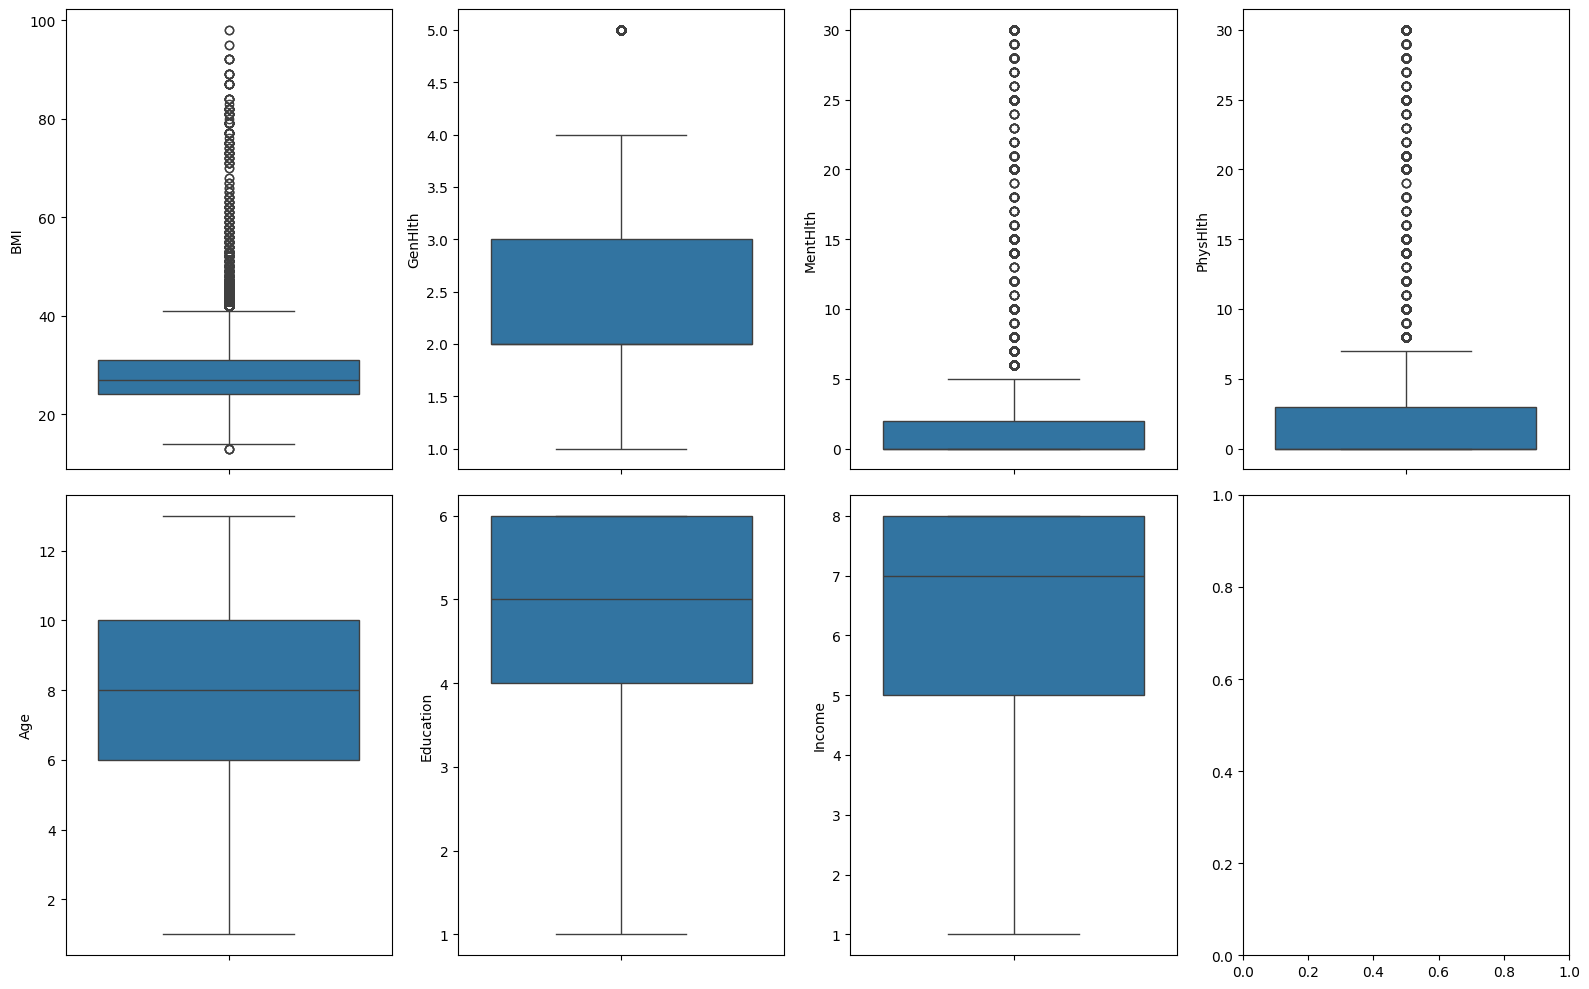

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

count = 0
for col in data.columns:
  if data[col].dtype == "float64" and len(data[col].value_counts()) > 2:
    sns.boxplot(data[col], ax=axes[count//4, count%4])
    count += 1
    
plt.tight_layout()